In [20]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [39]:
# Set directories
project_dir = '/Users/huripari/Documents/PhD/TCs_Genesis'
fs_dir = os.path.join(project_dir, 'FS_TCG')
# Set basin, n_clusters, cluster_type
basin = 'GLB'
n_clusters = 5
cluster_type = '' # , _anomaly, _deseason
data_dir = os.path.join(fs_dir, 'data', f'{basin}_{n_clusters}clusters{cluster_type}')

In [40]:
# Load dataset for the basin, number of clusters and cluster type selected
df_predictors = pd.read_csv(os.path.join(data_dir, f'predictors_1970-2022_{n_clusters}clusters_8vars_9idxs.csv'), index_col=0)
df_target = pd.read_csv(os.path.join(data_dir, f'target_1970-2022_2.5x2.5.csv'), index_col=0)
df_target.index = pd.to_datetime(df_target.index)
df_predictors.index = pd.to_datetime(df_predictors.index)
df_target = df_target.loc[(df_predictors.index.year >= 1980) & (df_predictors.index.year <= 2021)]
df_predictors = df_predictors.loc[(df_predictors.index.year >= 1980) & (df_predictors.index.year <= 2021)]

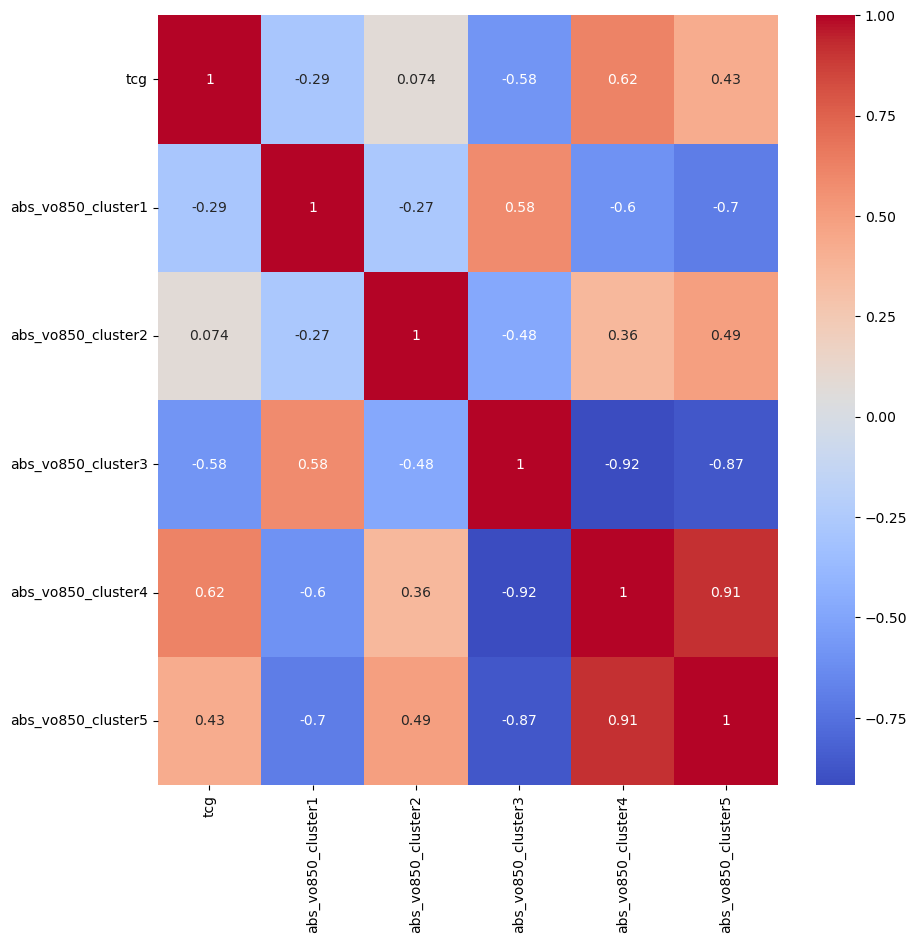

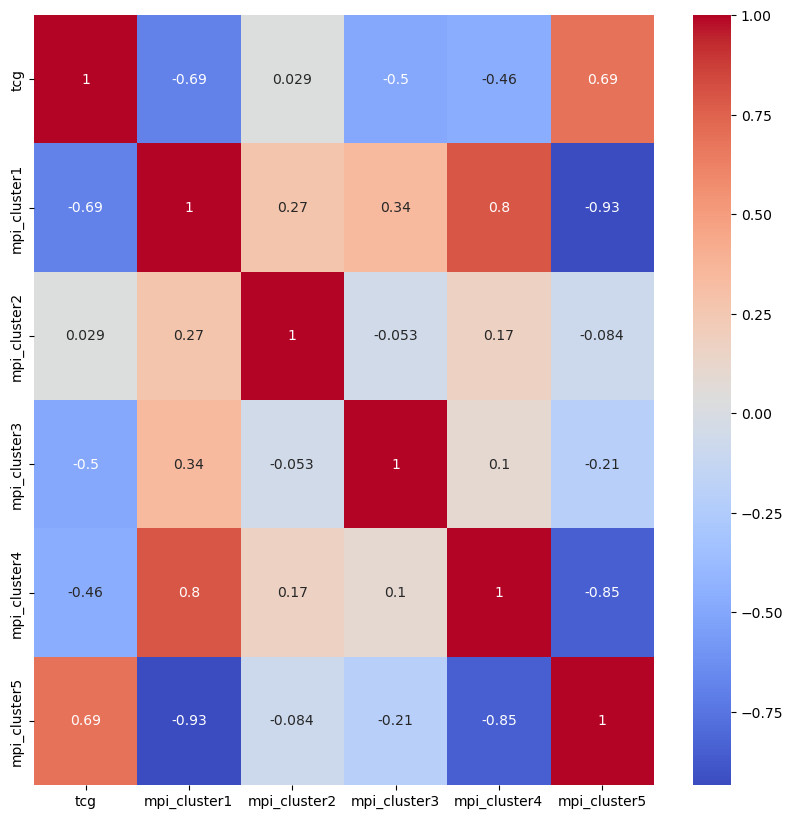

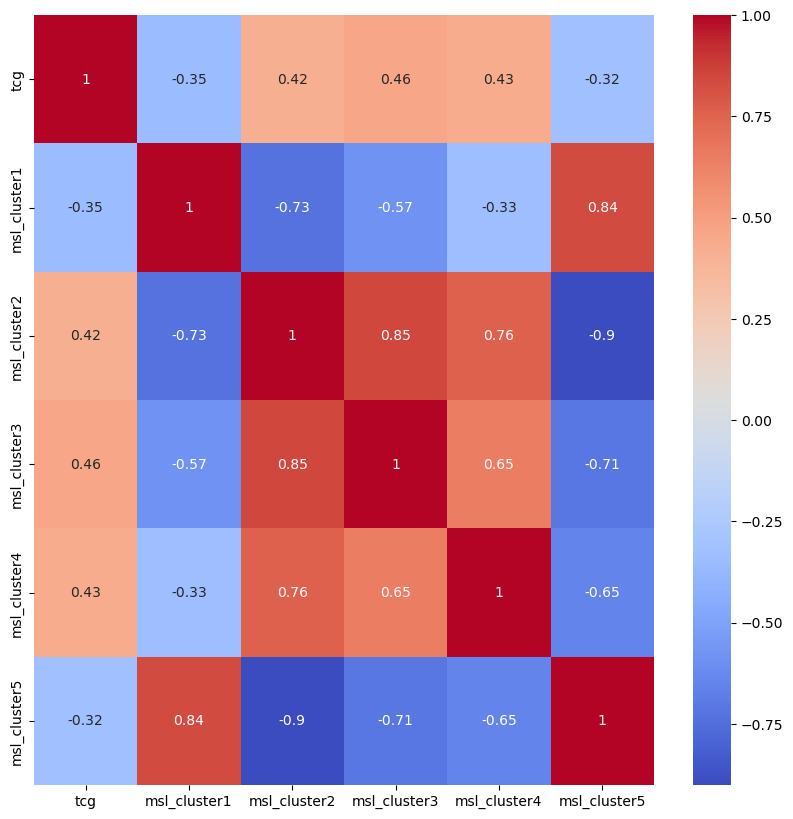

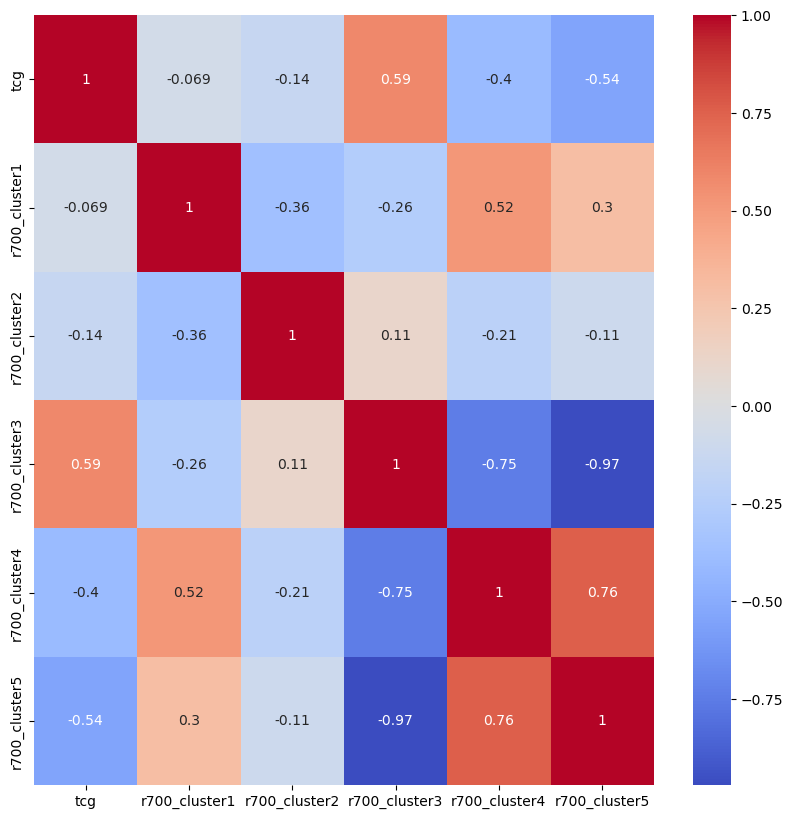

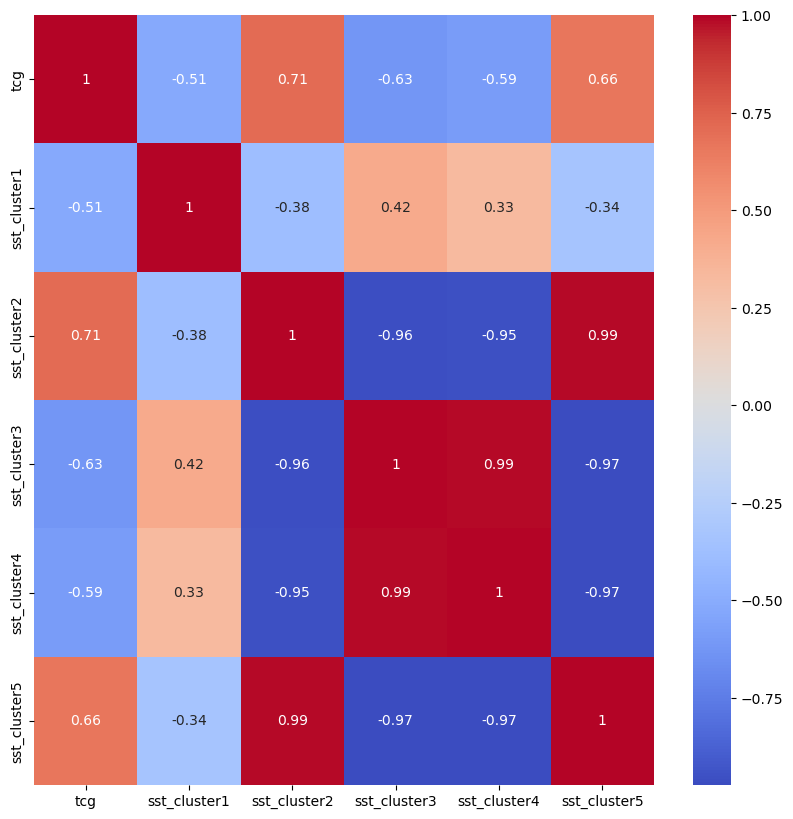

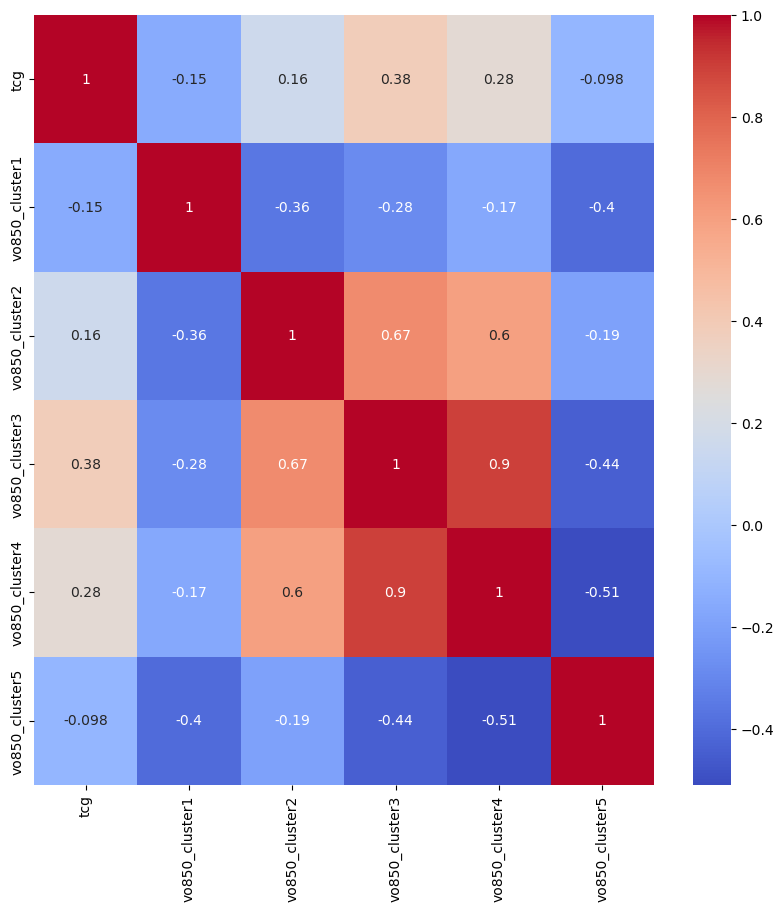

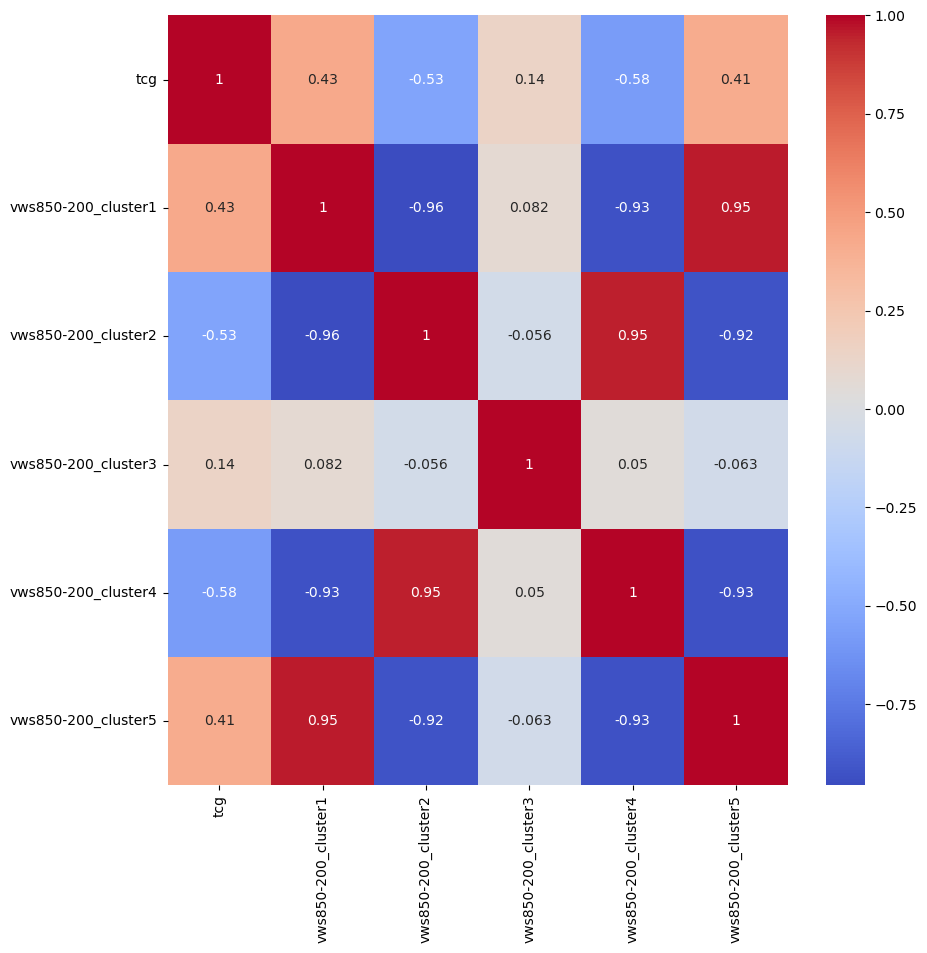

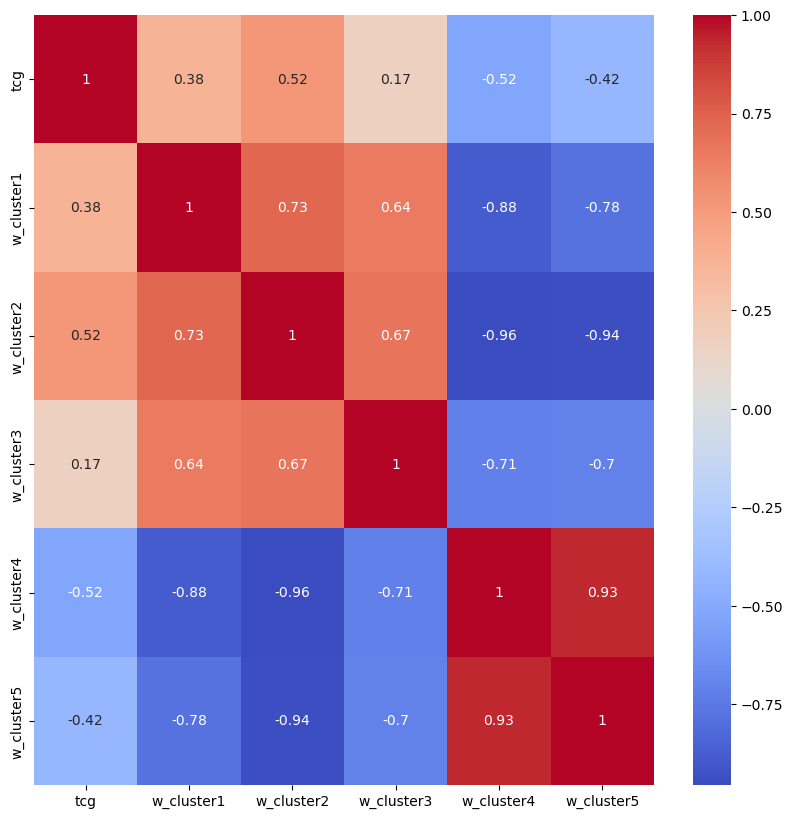

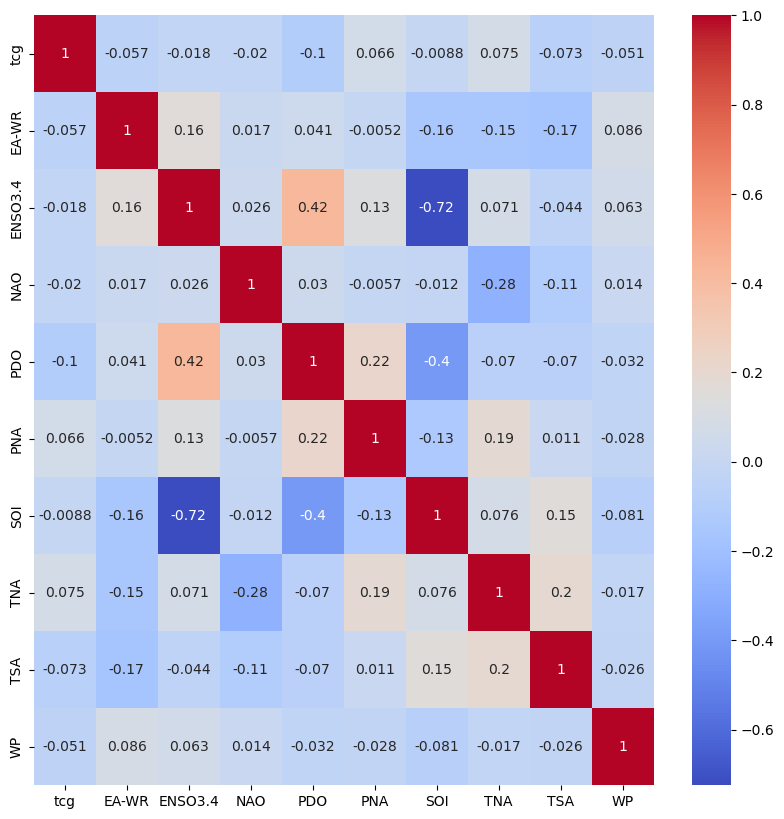

In [41]:
# Compute correlation matrix for the variables
vars = ['abs_vo850', 'mpi', 'msl', 'r700', 'sst', 'vo850', 'vws850-200', 'w', 'cluster']
for var in vars:
    if var != 'cluster':
        columns = [f'{var}_cluster{i}' for i in range(1, n_clusters+1)]
    else:
        columns = ['EA-WR', 'ENSO3.4', 'NAO', 'PDO', 'PNA', 'SOI', 'TNA', 'TSA', 'WP'] 
    df_pred = df_predictors[columns]
    dataframe = pd.concat([df_target, df_pred], axis=1)
    corr = dataframe.corr()
    plt.figure(figsize=(10, 10))
    sns.heatmap(corr, annot=True, cmap='coolwarm')